In [ ]:
!ls

sample_data


In [ ]:
!gdown --id 1Nl-RU5HggCSWWqINN4gbxHAVzER6T2Po

!gzip -d /content/HIGGS_6M.csv.gz

!ls

with open('HIGGS_6M.csv', 'r') as fh:
  print(fh.readline())

Downloading...
From: https://drive.google.com/uc?id=1Nl-RU5HggCSWWqINN4gbxHAVzER6T2Po
To: /content/HIGGS_6M.csv.gz
1.56GB [00:08, 184MB/s]
gzip: /content/HIGGS_6M.csv already exists; do you wish to overwrite (y or n)? n
	not overwritten
HIGGS_6M.csv  HIGGS_6M.csv.gz  sample_data
1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,-6.536741852760314941e-01,9.303491115570068359e-01,1.107436060905456543e+00,1.138904333114624023e+00,-1.578198313713073730e+00,-1.046985387802124023e+00,0.000000000000000000e+00,6.579295396804809570e-01,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475

## Data Analysis

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loads the dataframe
df = pd.read_csv("HIGGS_6M.csv", header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,-0.653674,0.930349,1.107436,1.138904,-1.578198,-1.046985,0.000000,0.657930,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,-0.213642,1.271015,2.214872,0.499994,-1.261432,0.732156,0.000000,0.398701,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,1.540659,-0.819690,2.214872,0.993490,0.356080,-0.208778,2.548224,1.256955,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,-0.676016,0.736159,2.214872,1.298720,-1.430738,-0.364658,0.000000,0.745313,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,1.020974,0.971407,2.214872,0.596761,-0.350273,0.631194,0.000000,0.479999,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [ ]:
len(df)

6000000

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.297242e-01,9.911388e-01,-6.317132e-06,3.633206e-04,9.981901e-01,3.190455e-05,9.908860e-01,-5.361822e-04,-8.940377e-05,1.000497e+00,9.924728e-01,3.722284e-04,-2.034389e-04,9.994989e-01,9.921424e-01,1.281615e-04,-2.103781e-04,1.000315e+00,9.859461e-01,5.495551e-05,1.010016e-05,9.995073e-01,1.034293e+00,1.024772e+00,1.050405e+00,1.009734e+00,9.730288e-01,1.033050e+00,9.597648e-01
std,4.991157e-01,5.648960e-01,1.008915e+00,1.006282e+00,5.999452e-01,1.006247e+00,4.750803e-01,1.009190e+00,1.005880e+00,1.027797e+00,5.000136e-01,1.009539e+00,1.006107e+00,1.049401e+00,4.874518e-01,1.008500e+00,1.006410e+00,1.193803e+00,5.058094e-01,1.007736e+00,1.006360e+00,1.400049e+00,6.733134e-01,3.804712e-01,1.640427e-01,3.974409e-01,5.255591e-01,3.653359e-01,3.133356e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,3.943779e-04,-1.743944e+00,1.376856e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889811e-01,-2.913090e+00,-1.742372e+00,0.000000e+00,2.636076e-01,-2.729663e+00,-1.742069e+00,0.000000e+00,3.653542e-01,-2.497265e+00,-1.742691e+00,0.000000e+00,8.349229e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.812501e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.903873e-01,-7.392965e-01,-8.713760e-01,5.765905e-01,-8.711470e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,6.563349e-01,-6.944718e-01,-8.701791e-01,0.000000e+00,6.508527e-01,-6.988981e-01,-8.716891e-01,0.000000e+00,6.172805e-01,-7.133574e-01,-8.720338e-01,0.000000e+00,7.906300e-01,8.462154e-01,9.857487e-01,7.675424e-01,6.738656e-01,8.194172e-01,7.703784e-01
50%,1.000000e+00,8.531884e-01,9.198132e-04,9.714414e-04,8.913502e-01,3.782700e-04,8.946361e-01,-1.015666e-03,-4.961938e-04,1.086538e+00,8.898859e-01,6.027267e-05,-2.032892e-04,0.000000e+00,8.972494e-01,1.728937e-04,-1.972152e-04,0.000000e+00,8.679899e-01,3.721330e-04,-2.642369e-04,0.000000e+00,8.949544e-01,9.506519e-01,9.897749e-01,9.165314e-01,8.734430e-01,9.473684e-01,8.718743e-01
75%,1.000000e+00,1.236043e+00,7.382142e-01,8.709940e-01,1.292679e+00,8.714819e-01,1.170740e+00,6.862039e-01,8.683126e-01,2.173076e+00,1.201749e+00,6.955639e-01,8.693178e-01,2.214872e+00,1.221447e+00,7.001541e-01,8.713947e-01,2.548224e+00,1.220930e+00,7.141017e-01,8.710505e-01,3.101961e+00,1.024868e+00,1.083482e+00,1.020313e+00,1.142169e+00,1.138591e+00,1.140515e+00,1.059126e+00
max,1.000000e+00,1.039601e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,8.848616e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,2.913210e+00,1.743175e+00,2.214872e+00,1.142382e+01,2.730009e+00,1.742884e+00,2.548224e+00,1.288257e+01,2.498009e+00,1.743372e+00,3.101961e+00,3.107619e+01,1.563786e+01,7.992739e+00,1.426244e+01,1.776285e+01,8.779915e+00,6.966903e+00


In [ ]:
df.isnull().sum()

Class    0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64

No null values or missing values

In [ ]:
df=df.rename(columns={0:'Class'})

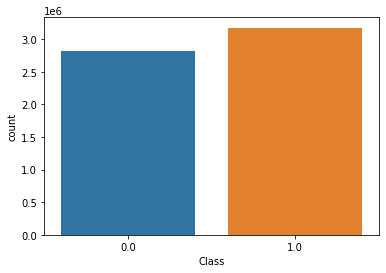

In [ ]:
import seaborn as sns
sns.countplot(x=df['Class'],data=df)

We can observe that the dataset is not highly imbalanced.

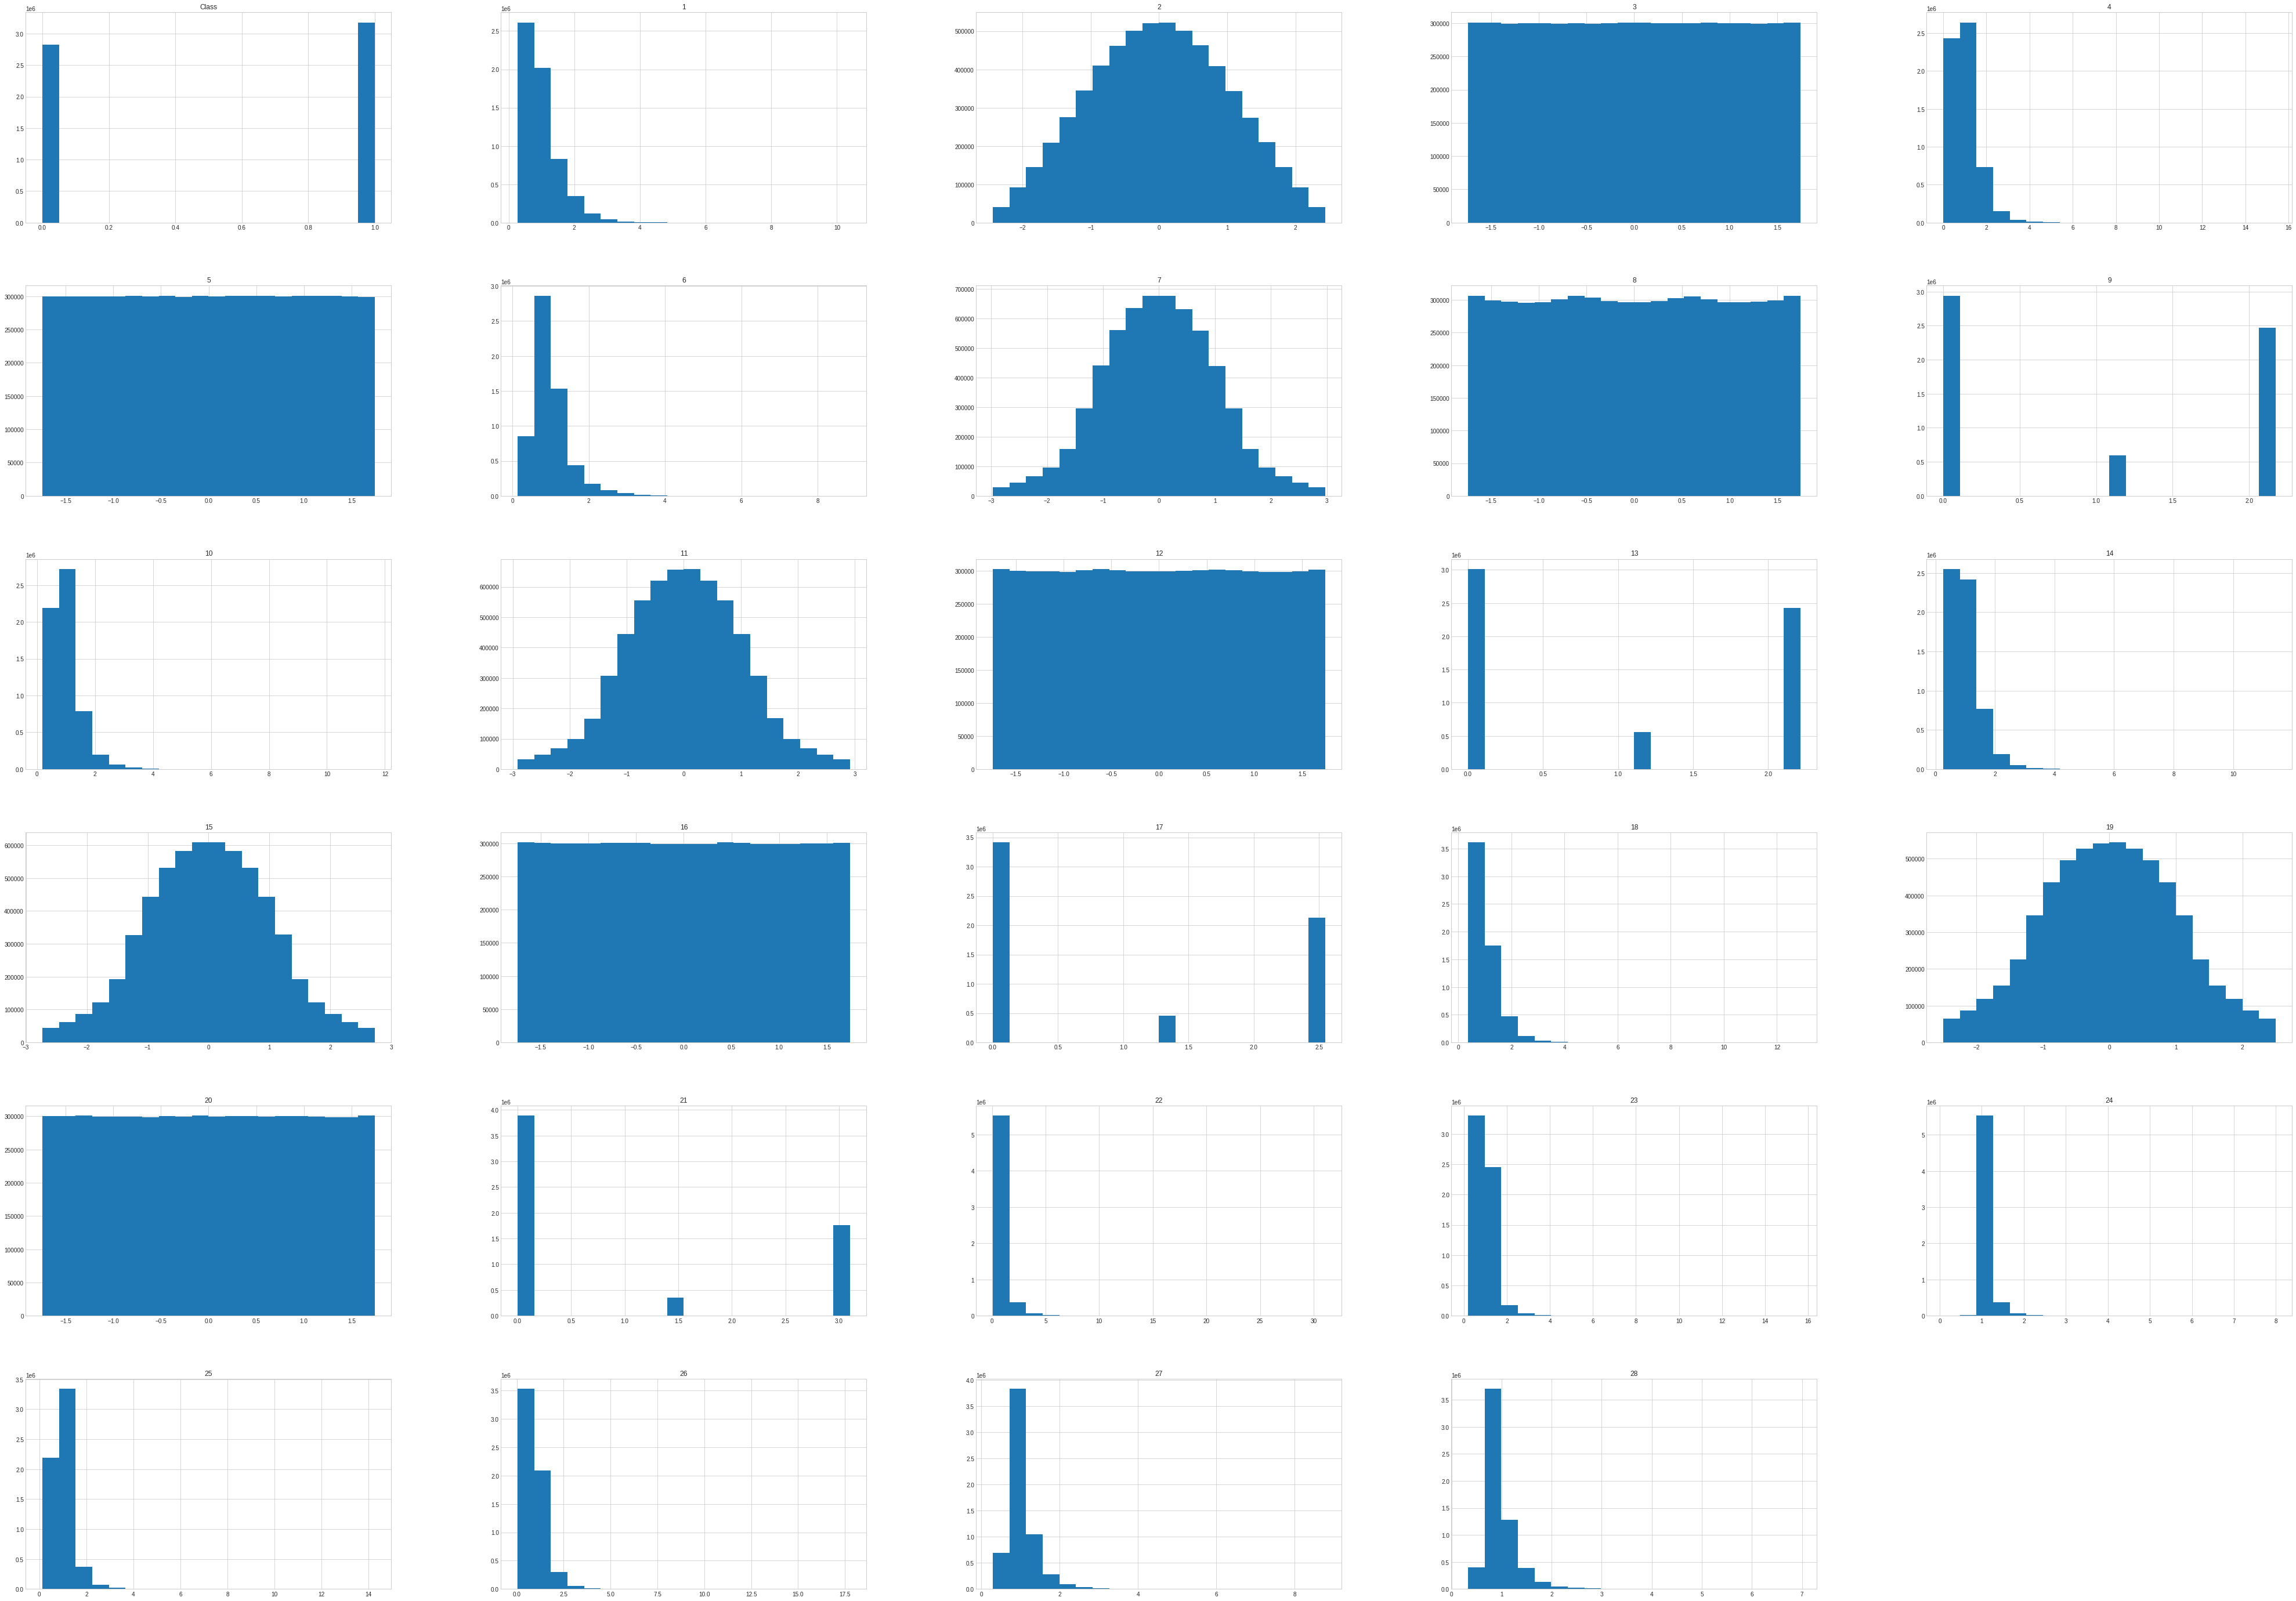

In [ ]:
plt.style.use('seaborn-whitegrid')

# Plot all in same plot
df.hist(bins=20, figsize=(70, 50))
plt.show()

We can see that columns 9,17,13 and 21 have only three distinct values. Hence may perform one hot encoding on them.

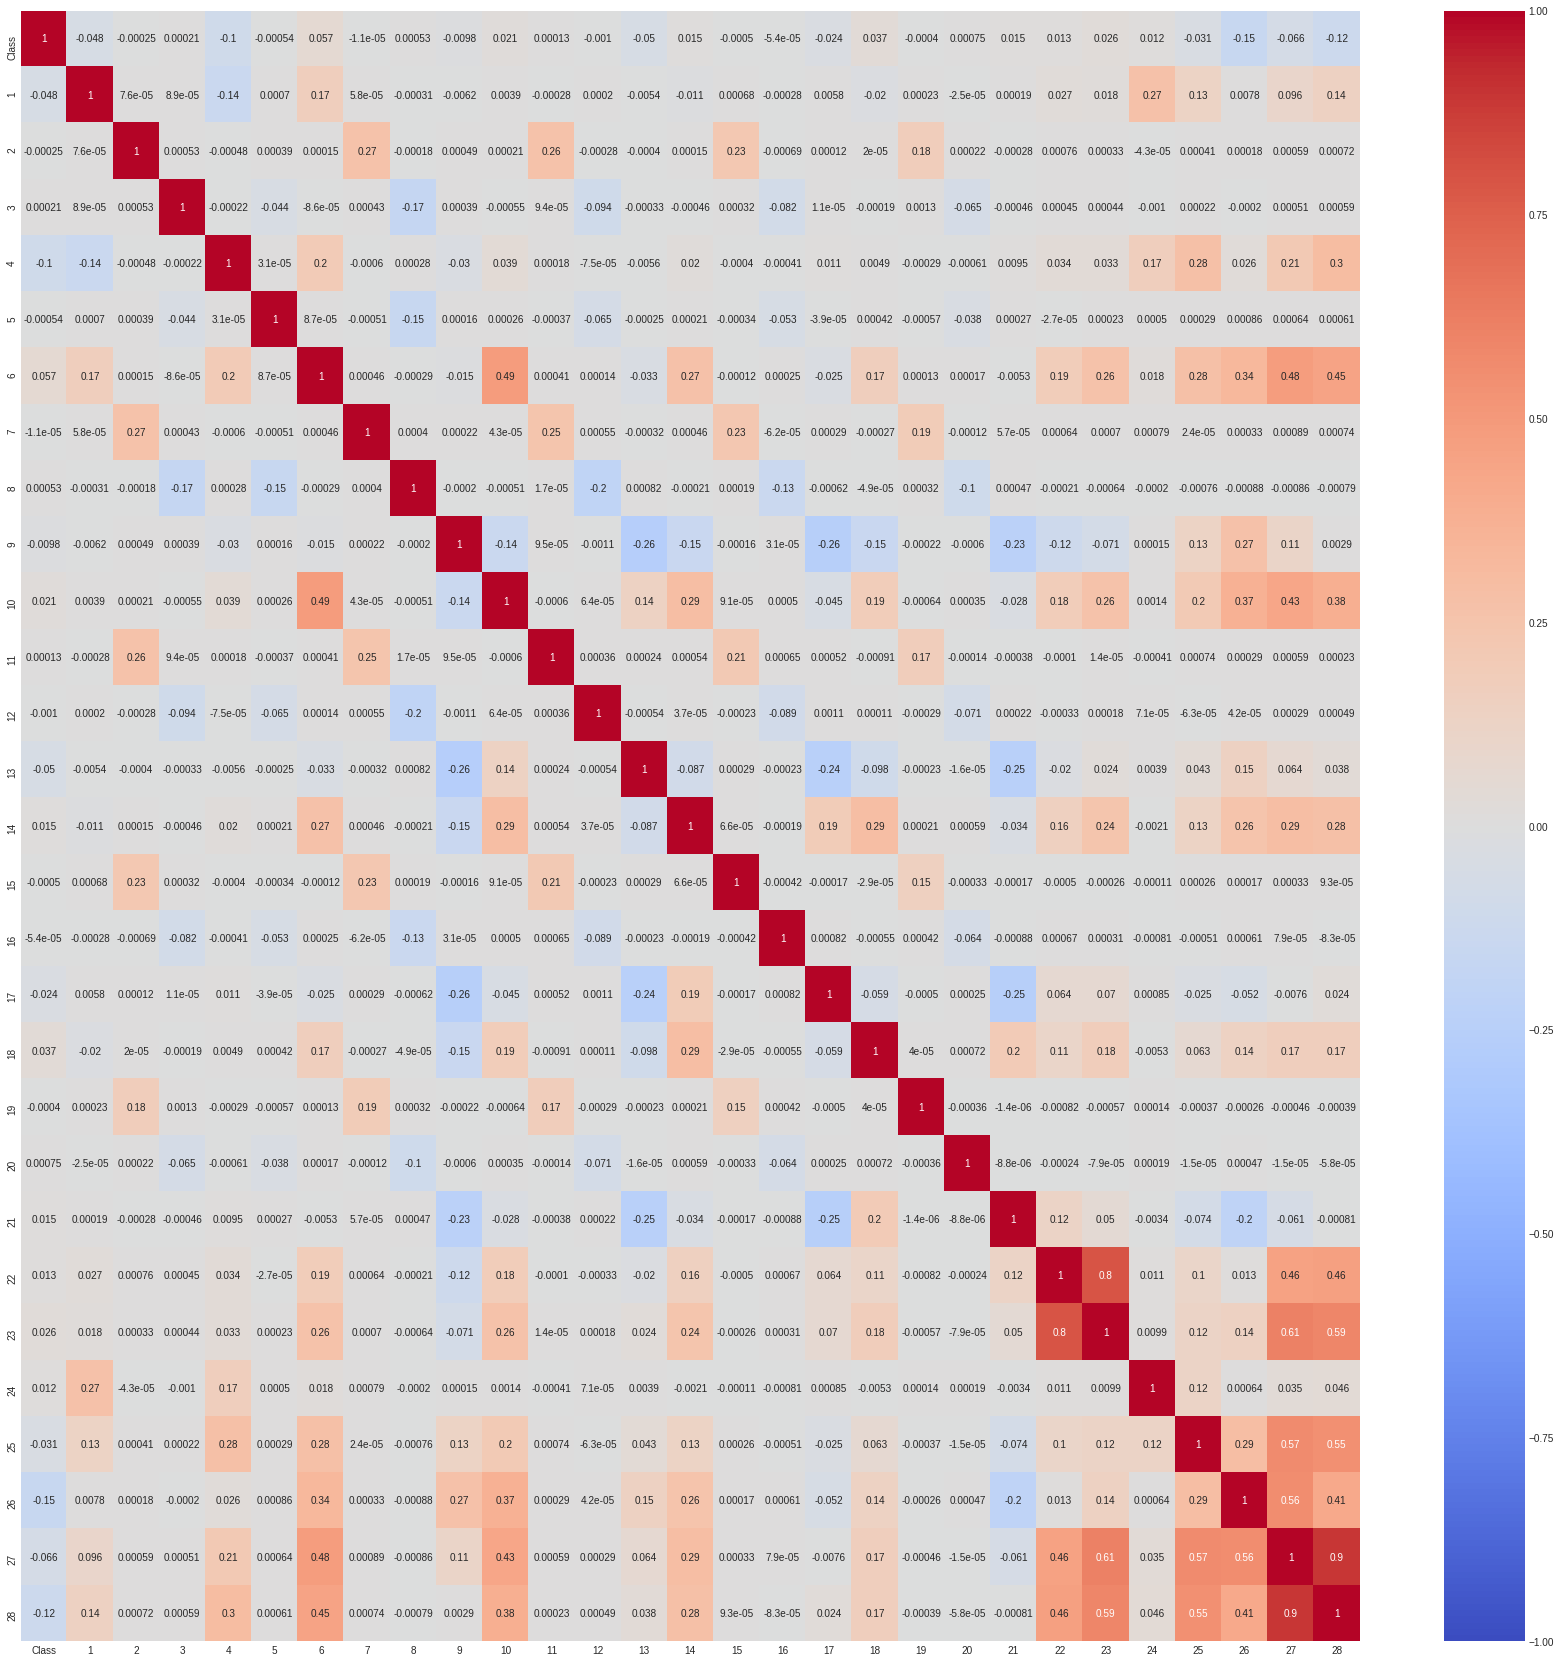

In [ ]:
corrMatrix = df.corr()

plt.figure(figsize=(30,30))

sns.heatmap(corrMatrix, annot=True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()


From the above heat map which visualizes the correlation matrix we can see that majority of the first 21 features[1-21] are independent of each other.This will help us in deciding which dimensionality reduction techniques to choose.

## As mentioned in the task we will split the data into train and test where the last 500k samples make up the test.Classification is done without changing the number of columns or performing any transformations except for scaling.

In [ ]:
X=df.drop(['Class'],axis=1)

In [ ]:
Y=df['Class']

In [ ]:
#Splitting into train and test
X_train = X[:5500000]
y_train = Y[:5500000]
X_test = X[-500000:]
y_test = Y[-500000:]

In [ ]:
len(X_train),len(X_test)

(5500000, 500000)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5500000, 28)
(500000, 28)
(5500000,)
(500000,)


In [ ]:

#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



1.   Now that we have our train and test sets we will build our classifiers
2.   We will be using the following classifiers and look at their metrics:<br>Logistic regression,Random Forest,SGDClassifier,MLPClassifier











In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score

In [ ]:
def eval(model, X, y):
  y_pred = model.predict(X)
  conf_mat = confusion_matrix(y, y_pred)
  pr = precision_score(y, y_pred)
  rc = recall_score(y, y_pred)
  acc = accuracy_score(y, y_pred)
  f1=f1_score(y,y_pred)
  #Other metrics
  print("Confusion Matrix:\n", conf_mat)
  print("Precision: ", pr)
  print("Recall: ", rc)
  print("Accuracy: ", acc)
  print("F1 score: ", f1)
  # ROC - AUC
  y_predict_proba = model.predict_proba(X)[:, 1]
  precision, recall, thresholds = precision_recall_curve(y, y_predict_proba)
  fpr, tpr, thresholds = roc_curve(y, y_predict_proba)
  plot_roc_curve(model, X, y)
  plt.show()
  print('ROC AUC', auc(fpr, tpr), '\n', 'PR AUC', auc(recall, precision))

Confusion Matrix:
 [[124036 110894]
 [ 68941 196129]]
Precision:  0.6388088188832759
Recall:  0.7399139849850983
Accuracy:  0.64033
F1 score:  0.6856542555144006


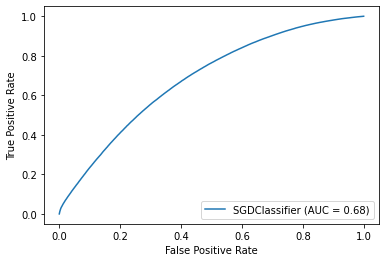

ROC AUC 0.6834761232740567 
 PR AUC 0.684321070102401


In [ ]:
#We will define a function which will take model as input along with test set
sgd_clf = SGDClassifier(random_state=42,loss='log')
sgd_clf.fit(X_train_scaled,y_train)
eval(sgd_clf,X_test_scaled,y_test)


Confusion Matrix:
 [[162258  72672]
 [ 63802 201268]]
Precision:  0.7347156311601081
Recall:  0.7593013166333421
Accuracy:  0.727052
F1 score:  0.7468061817034934


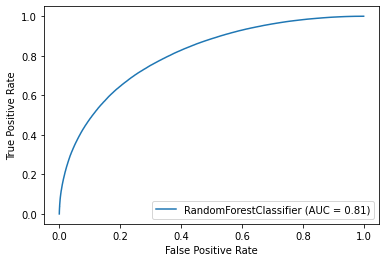

ROC AUC 0.8061237161671644 
 PR AUC 0.821442759712795


In [ ]:
model=RandomForestClassifier(max_depth=15, n_estimators=15, max_features='auto')
model.fit(X_train_scaled,y_train)
eval(model,X_test_scaled,y_test)

Confusion Matrix:
 [[123989 110941]
 [ 68406 196664]]
Precision:  0.6393394125583134
Recall:  0.7419323197645905
Accuracy:  0.641306
F1 score:  0.6868258610904963


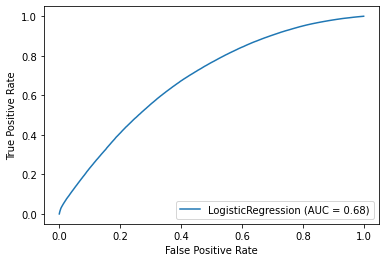

ROC AUC 0.6840790659980093 
 PR AUC 0.6833661035614811


In [ ]:
log_clf=LogisticRegression()
log_clf.fit(X_train_scaled,y_train)
eval(log_clf,X_test_scaled,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Confusion Matrix:
 [[165027  69903]
 [ 56544 208526]]
Precision:  0.7489377902445506
Recall:  0.7866827630437243
Accuracy:  0.747106
F1 score:  0.76734639806145


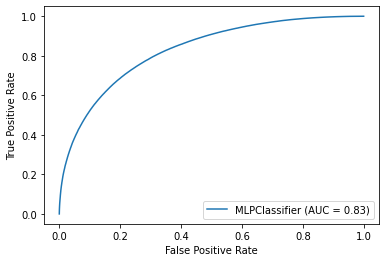

ROC AUC 0.8280250679079155 
 PR AUC 0.8412680052806728


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
mlp.fit(X_train_scaled, y_train)
eval(mlp, X_test_scaled, y_test)

Out of all the models MLP performed the best followed by Random Forest.Logistic Regression and SGDClassifier almost gave the same performance.

In [ ]:
#Saving the models
import pickle
filename = 'mlp_model.sav'
filename1 = 'log_model.sav'
filename2 = 'SGD_model.sav'
filename3 = 'randomclass_model.sav'
pickle.dump(sgd_clf, open(filename2, 'wb'))
pickle.dump(log_clf, open(filename1, 'wb'))
pickle.dump(model, open(filename3, 'wb'))
pickle.dump(mlp, open(filename, 'wb'))

In [ ]:
#To load the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)#replace the name with the name you have assigned for the test set.

## Dimensionality Reduction

We will make use of two dimensionality techniques:<br>
1.PCA<br>
2.Autoencoder

### PCA

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set's variance.<br>We can then plot the explained variance as a function of the number of dimensions.

Text(0, 0.5, 'cumulative explained variance')

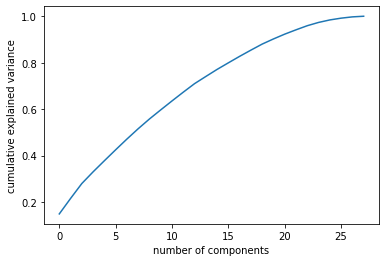

In [ ]:
#Let us see how much data is reduced to preserve 95% variance
import numpy as np
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

From the graph we can observe that around 23 components will be required to preserve 95% variance.

In [ ]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

In [ ]:
pca.explained_variance_ratio_

array([0.14878163, 0.06658054, 0.06437038, 0.05026705, 0.04784411,
       0.04710653, 0.04623495, 0.04446717, 0.04202084, 0.03918414,
       0.03851675, 0.03773399, 0.03666956, 0.03086617, 0.03046766,
       0.02833507, 0.02793422, 0.02677464, 0.0260144 , 0.02210901,
       0.02068799, 0.0185899 , 0.01771254])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Confusion Matrix:
 [[155949  78981]
 [ 65509 199561]]
Precision:  0.7164485068679051
Recall:  0.7528615082808314
Accuracy:  0.71102
F1 score:  0.7342038071271421


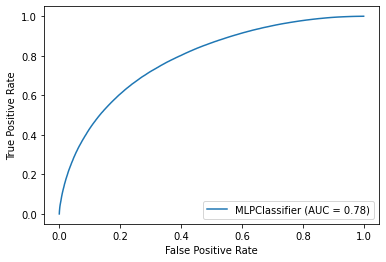

ROC AUC 0.7842582816741405 
 PR AUC 0.7953086267914594


In [ ]:
mlp=MLPClassifier(max_iter=30)
mlp.fit(X_reduced, y_train)
eval(mlp, X_test_reduced, y_test)

Confusion Matrix:
 [[134119 100811]
 [ 60953 204117]]
Precision:  0.6693940864728722
Recall:  0.7700494209076848
Accuracy:  0.676472
F1 score:  0.7162025129912738


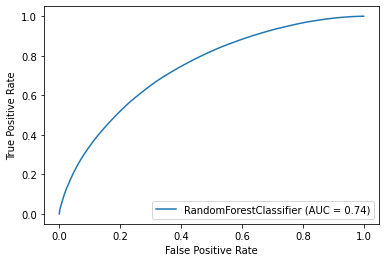

ROC AUC 0.7403650015382054 
 PR AUC 0.7478033245354446


In [ ]:
random=RandomForestClassifier(max_depth=15, n_estimators=15, max_features='auto')
random.fit(X_reduced,y_train)
eval(random,X_test_reduced,y_test)

In [ ]:
filename = 'mlp_pca_model.sav'
filename2 = 'random_pca_model.sav'
pickle.dump(random, open(filename2, 'wb'))
pickle.dump(mlp, open(filename, 'wb'))

We can see that the neural network performed the best.Hence we will build a neural network classifier and compare its performance.

### Autoencoders

Here I have performed PCA with an Undercomplete Linear Autoencoder.
This means that the autoencoder uses only linear activations and the cost function is the MSE.
Below is a basic autoencoder

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Activation,Dense,Dropout,Input
from keras import optimizers,regularizers

Epoch 1/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.1995
Epoch 2/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0408
Epoch 3/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0408
Epoch 4/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0408
Epoch 5/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0408
Epoch 6/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0408
Epoch 7/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0408
Epoch 8/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0408
Epoch 9/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0408
Epoch 10/10
5372/5372 [==============================] - 11s 2ms/step - loss: 0.0407


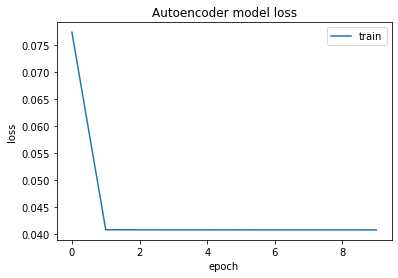

In [ ]:
encoding_dim=23
input_data = Input(shape=(X_train_scaled.shape[1],))
encoded = Dense(encoding_dim)(input_data)
decoded = Dense(X_train_scaled.shape[1])(encoded)
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam',
                    loss='mse')
ae = autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=10,
                batch_size=1024,
                shuffle=True
)
plt.figure()
plt.plot(ae.history['loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
encoder = Model(input_data, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
encoded_train_x = encoder.predict(X_train_scaled)
encoded_test_x = encoder.predict(X_test_scaled)


In [ ]:
autoencoder.save('basic_autoencoder.h5')

Iteration 1, loss = 0.58704247
Iteration 2, loss = 0.57084503
Iteration 3, loss = 0.56686455
Iteration 4, loss = 0.56459817
Iteration 5, loss = 0.56292476
Iteration 6, loss = 0.56187790
Iteration 7, loss = 0.56112811


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix:
 [[153192  81738]
 [ 64724 200346]]
Precision:  0.7102352490747437
Recall:  0.7558229901535444
Accuracy:  0.707076
F1 score:  0.7323203339462016


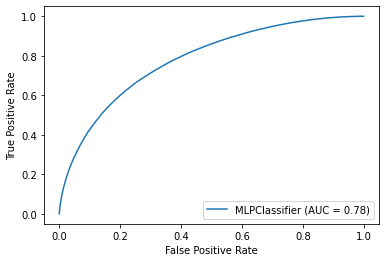

ROC AUC 0.7801323093616697 
 PR AUC 0.7924781159537787


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_basic_encoder = MLPClassifier(max_iter=7, verbose=True)
mlp_basic_encoder.fit(encoded_train_x, y_train)
eval(mlp_basic_encoder, encoded_test_x, y_test)

In [ ]:
filename = 'mlp_autoencoder.sav'
pickle.dump(mlp_basic_encoder, open(filename, 'wb'))

Using Deep autoencoder

Epoch 1/10
5372/5372 [==============================] - 14s 3ms/step - loss: 0.3547 - val_loss: 0.2009
Epoch 2/10
5372/5372 [==============================] - 14s 3ms/step - loss: 0.2008 - val_loss: 0.2007
Epoch 3/10
5372/5372 [==============================] - 13s 2ms/step - loss: 0.2008 - val_loss: 0.2008
Epoch 4/10
5372/5372 [==============================] - 13s 2ms/step - loss: 0.2008 - val_loss: 0.2006
Epoch 5/10
5372/5372 [==============================] - 13s 2ms/step - loss: 0.2006 - val_loss: 0.2006
Epoch 6/10
5372/5372 [==============================] - 14s 3ms/step - loss: 0.2007 - val_loss: 0.2006
Epoch 7/10
5372/5372 [==============================] - 13s 2ms/step - loss: 0.2008 - val_loss: 0.2006
Epoch 8/10
5372/5372 [==============================] - 14s 3ms/step - loss: 0.2006 - val_loss: 0.2006
Epoch 9/10
5372/5372 [==============================] - 13s 2ms/step - loss: 0.2006 - val_loss: 0.2006
Epoch 10/10
5372/5372 [==============================] - 14s 3ms/step - l

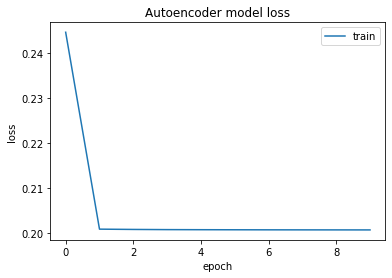

In [ ]:
encoding_dim=16
input_data = Input(shape=(X_train_scaled.shape[1],))
encoded = Dense(23)(input_data)
encoded = Dense(18)(encoded)
encoded = Dense(encoding_dim)(encoded)
decoded = Dense(18)(encoded)
decoded = Dense(23)(decoded)
decoded = Dense(X_train_scaled.shape[1])(decoded)
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam',
                    loss='mse')
ae = autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=10,
                batch_size=1024,
                shuffle=True,
                validation_data=(X_test_scaled,X_test_scaled)
)
plt.figure()
plt.plot(ae.history['loss'])
plt.title('Autoencoder model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
encoder = Model(input_data, encoded)
encoded_input = Input(shape=(encoding_dim,))


In [ ]:
encoded_train_x = encoder.predict(X_train_scaled)
encoded_test_x = encoder.predict(X_test_scaled)


Iteration 1, loss = 0.63358071
Iteration 2, loss = 0.62063457
Iteration 3, loss = 0.61700020
Iteration 4, loss = 0.61493445
Iteration 5, loss = 0.61343073
Iteration 6, loss = 0.61249777
Iteration 7, loss = 0.61187722


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix:
 [[138243  96687]
 [ 70913 194157]]
Precision:  0.6675640549572966
Recall:  0.7324744407137738
Accuracy:  0.6648
F1 score:  0.6985145184327073


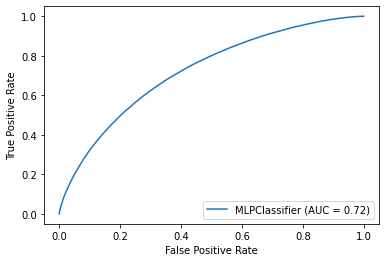

ROC AUC 0.7230937229863914 
 PR AUC 0.733293228707374


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_encoder = MLPClassifier(max_iter=7, verbose=True)
mlp_encoder.fit(encoded_train_x, y_train)
eval(mlp_encoder, encoded_test_x, y_test)

In [ ]:
import pickle
filename = 'mlp_encoder_model.sav'
pickle.dump(mlp_encoder, open(filename, 'wb'))

In [ ]:
import tensorflow as tf
autoencoder.save('stacked_autoencoder.h5')

In [ ]:
#To load the model
import tensorflow as tf
model = tf.keras.models.load_model('/filename.h5')

## Results

1.The data we used was only scaled and no other preprocessing techniques were used.<br>2.First we considered all 28 features and applied classification algorithms on it.The results are as follows:<BR><b>a)MLP</b>:<BR>Precision:  0.7489377902445506<BR>
Recall:  0.7866827630437243<BR>
Accuracy:  0.747106<BR>
F1 score:  0.76734639806145<BR>ROC AUC 0.8280250679079155<br>
 PR AUC 0.8412680052806728<br><b>b)Random Forest</b><br>Precision:  0.7347156311601081<br>
Recall:  0.7593013166333421<br>
Accuracy:  0.727052<br>
F1 score:  0.7468061817034934<br>
ROC AUC 0.8061237161671644<br> 
 PR AUC 0.821442759712795<br>
 <b>c)SGDClassifier</b><br>
 Precision:  0.6388088188832759<br>
Recall:  0.7399139849850983<br>
Accuracy:  0.64033<br>
F1 score:  0.6856542555144006<br>
ROC AUC 0.6834761232740567<br> 
 PR AUC 0.684321070102401<br>
 <b>d)Logistic Regression</b><br>
 Precision:  0.6393394125583134<br>
Recall:  0.7419323197645905<br>
Accuracy:  0.641306<br>
F1 score:  0.6868258610904963<br>
ROC AUC 0.6840790659980093<br> 
 PR AUC 0.6833661035614811<br>


We can see that the **Multi-Layer Perceptron** model performs the best followed by Random Forest Classifier.<br>This indicates that our next step should be building ANN(especially DNN) to perform the classification.<hr>

**PCA**

Coming to the next step of Dimensionality reduction following points were observed.<br>1.We used the most popular dimensionality reduction technique PCA and found out that to **preserve maximum variance** and not let the classification performance take a hit the number of dimensions to be considered were **23**.<br>
After PCA we saw how the **MLP** performed:<br>Precision:  0.7164485068679051<br>
Recall:  0.7528615082808314<br>
Accuracy:  0.71102<br>
F1 score:  0.7342038071271421<br>
ROC AUC 0.7842582816741405<br> 
PR AUC 0.7953086267914594<br>

**Autoencoder**<br><br>
Autoencoders are also a very popular technique for data and compression and can also be used like PCA for dimensionality reduction.<br>1.
Here a basic autoencoder was used first with dimensions reduced to 23 from 28 and then the reduced data was fed to MLP.<br>Following were the results:<br>Precision:  0.7102352490747437<br>
Recall:  0.7558229901535444<br>
Accuracy:  0.707076<br>
F1 score:  0.7323203339462016<br>
ROC AUC 0.7801323093616697<br> 
 PR AUC 0.7924781159537787<br><br>2.To see how further reduction in dimesnions would affect the classification performance a 3 layer deep autoencoder was used with a target of 16 dimensions.
This reduced data was then fed to the MLP<br>
Precision:  0.6675640549572966<br>
Recall:  0.7324744407137738<br>
Accuracy:  0.6648<br>
F1 score:  0.6985145184327073<br>
ROC AUC 0.7230937229863914 <br>
 PR AUC 0.733293228707374<br><hr>


**Summary of MLP model performance**.<br>
1.Without dimensionality reduction<br>
accuracy:0.747106<br>
ROC AUC 0.8280250679079155<br>
PR AUC 0.8412680052806728<br><br>
2.PCA(23 dimensions)<br>
accuracy:0.71102<br>
ROC AUC 0.7842582816741405<br>
PR AUC 0.7953086267914594<br><br>
3.Autoencoder(23 dimensions)<br>
Accuracy: 0.707076<br>
ROC AUC 0.7801323093616697<br>
PR AUC 0.7924781159537787<br><br>
4.Deep Autoencoder(16 dimensions)<br>
Accuracy: 0.6648<br>
ROC AUC 0.7230937229863914<br>
PR AUC 0.733293228707374<br><br><hr>


## Conclusion


1.On observing the heat map displaying the correlation between the features we see that for **majority of the features, especially the first 21 which correspond to the degrees of freedom, there is no correlation between them and they can be considered to be independent of each other.**<br><br>
2.Due to this reason, dimensionality reduction techniques will not work very well to **reduce the dimensions or number of features considerably and maintain the classification performance** at the same time.<br><br>
3.This can be corroborated by the **results obtained from the PCA analysis**  which reduced the dimensions from **28 to only 23**.
Also, when we further reduce the dimesions we see that there is a **dip in accuracy (74% to 66%)**.<br><br>4.ANN and DNN will be best suited for this task instead of prebuilt machine learning models.


## Future Work


1.Further preprocessing of data like **one hot encoding**.<br>
2.Working only with first 21 features and performing dimensionality reduction on those features.<br>
3.Experimenting with **different architectures** of neural networks and hyperparameter tuning.<br>
4.Trying out other Dimensionality reduction techniques like **t-SNE,LDA** etc. and comparing them against PCA.<br>
5.Getting some insight into the features and how the last 7 features are exactly related to the first 21 for better results.<br>
6.Using PCA or other technique on the output of autoencoder to see if dimensions can be reduced further.<br>
7.**Considering that all this work was done in a span of 3-4 days as part time work due to college exams and current internship, meaningful results and effective techniques can be established throughout the course of 3 months of GSOC21.**
